In [1]:
import numpy as np
import networkx as nx

def genlaplacian(G, x, nodelist=None):
    if x==0:
        D = nx.laplacian_matrix(G).toarray()
    else:
        D = nx.floyd_warshall_numpy(G, nodelist)
        rowsize = D.shape[0]
        for i in range(0, rowsize):
            for j in range(i+1, rowsize):
                if(D[i,j] ==1):
                    D[i,j]= D[j,i] = -1
                else:
                    D[i,j] = D[j,i] = -D[i,j]*(pow(x, (D[i,j]-1)))
            D[i,i] = -1*(D[i].sum())
    return D

In [38]:
tt_vals={}
phi_0 = np.random.randint(0, 100, size=1000)

In [39]:
#for larger networks
import numpy as np
import networkx as nx
from scipy import linalg as LA

fh=open("graph-exponent-2.dat", 'rb')
G=nx.read_edgelist(fh)
fh.close()
n = len(G.nodes())
    
#phi_0 = np.random.randint(0, 100, size=n)

x_vals = np.arange(0,0.5,0.005)
t_vals =[]
dif_0 = np.var(np.array(phi_0))
for x in x_vals:
    diff = dif_0
    L =  genlaplacian(G,x)
    D, V = LA.eigh(L);                              #Compute the eigenvalues/vectors of the laplacian matrix
    D = np.reshape(D,(n,1), order='F')
    phi_0 = np.reshape(phi_0,(n,1), order='F');
    phi_0V = np.dot((V.conj().transpose()),phi_0) 
    t=0.05
    while (diff > 0.00001) :                 #Loop through times and decay each initial component
        Phi = (phi_0V* (np.exp(-D*t)));                             #Exponential decay for each component
        Phi = np.dot(V,Phi);               
        phi_t = (Phi.ravel()).tolist()            
        diff = np.var(np.array(phi_t))
        t = t+0.05
    t_vals.append(t-0.05)
#tt_vals.append(t_vals)
tt_vals['gamma= 2.0']=t_vals

In [32]:
#for larger networks
import numpy as np
import networkx as nx
from scipy import linalg as LA

fh=open("graph-exponent-2.3.dat", 'rb')
G=nx.read_edgelist(fh)
fh.close()
n = len(G.nodes())
    
#phi_0 = np.random.randint(0, 100, size=n)

x_vals = np.arange(0,0.5,0.005)
t_vals =[]
dif_0 = np.var(np.array(phi_0))
for x in x_vals:
    diff = dif_0
    L =  genlaplacian(G,x)
    D, V = LA.eigh(L);                              #Compute the eigenvalues/vectors of the laplacian matrix
    D = np.reshape(D,(n,1), order='F')
    phi_0 = np.reshape(phi_0,(n,1), order='F');
    phi_0V = np.dot((V.conj().transpose()),phi_0) 
    t=0.05
    while (diff > 0.00001) :                 #Loop through times and decay each initial component
        Phi = (phi_0V* (np.exp(-D*t)));                             #Exponential decay for each component
        Phi = np.dot(V,Phi);               
        phi_t = (Phi.ravel()).tolist()            
        diff = np.var(np.array(phi_t))
        t = t+0.05
    t_vals.append(t-0.05)
#tt_vals.append(t_vals)
tt_vals['gamma= 2.3']=t_vals

In [40]:
#for larger networks
import numpy as np
import networkx as nx
from scipy import linalg as LA

fh=open("graph-exponent-2.7.dat", 'rb')
G=nx.read_edgelist(fh)
fh.close()
n = len(G.nodes())
    
#phi_0 = np.random.randint(0, 100, size=n)

x_vals = np.arange(0,0.5,0.005)
t_vals =[]
dif_0 = np.var(np.array(phi_0))
for x in x_vals:
    diff = dif_0
    L =  genlaplacian(G,x)
    D, V = LA.eigh(L);                              #Compute the eigenvalues/vectors of the laplacian matrix
    D = np.reshape(D,(n,1), order='F')
    phi_0 = np.reshape(phi_0,(n,1), order='F');
    phi_0V = np.dot((V.conj().transpose()),phi_0) 
    t=0.05
    while (diff > 0.00001) :                 #Loop through times and decay each initial component
        Phi = (phi_0V* (np.exp(-D*t)));                             #Exponential decay for each component
        Phi = np.dot(V,Phi);               
        phi_t = (Phi.ravel()).tolist()            
        diff = np.var(np.array(phi_t))
        t = t+0.05
    t_vals.append(t-0.05)
#tt_vals.append(t_vals)
tt_vals['gamma= 2.7']=t_vals

In [41]:
#for larger networks
import numpy as np
import networkx as nx
from scipy import linalg as LA

fh=open("graph-exponent-3.0.dat", 'rb')
G=nx.read_edgelist(fh)
fh.close()
n = len(G.nodes())
    
#phi_0 = np.random.randint(0, 100, size=n)

x_vals = np.arange(0,0.5,0.005)
t_vals =[]
dif_0 = np.var(np.array(phi_0))
for x in x_vals:
    diff = dif_0
    L =  genlaplacian(G,x)
    D, V = LA.eigh(L);                              #Compute the eigenvalues/vectors of the laplacian matrix
    D = np.reshape(D,(n,1), order='F')
    phi_0 = np.reshape(phi_0,(n,1), order='F');
    phi_0V = np.dot((V.conj().transpose()),phi_0) 
    t=0.05
    while (diff > 0.00001) :                 #Loop through times and decay each initial component
        Phi = (phi_0V* (np.exp(-D*t)));                             #Exponential decay for each component
        Phi = np.dot(V,Phi);               
        phi_t = (Phi.ravel()).tolist()            
        diff = np.var(np.array(phi_t))
        t = t+0.05
    t_vals.append(t-0.05)
#tt_vals.append(t_vals)
tt_vals['gamma= 3.0']=t_vals

In [3]:
import matplotlib.pyplot as plt

for value in tt_vals.values():
    plt.plot(x_vals,value)
    
plt.xlabel('x values')
plt.ylabel('Equilibrium time')
#plt.ylim(0.0,1.0)
plt.legend(tt_vals.keys())
plt.title('Diffusion of heat over a E_R(100,0.06) network')
plt.show()

NameError: name 'tt_vals' is not defined

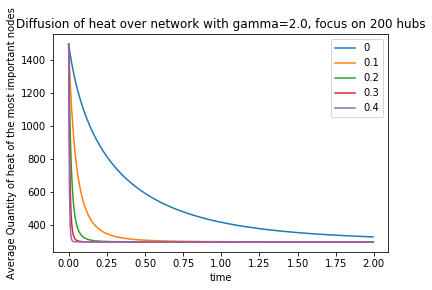

In [2]:
#for larger networks
import numpy as np
import networkx as nx
from scipy import linalg as LA
from heapq import nlargest
from operator import itemgetter
import matplotlib.pyplot as plt

fh=open("graph-exponent-2.dat", 'rb')
G=nx.read_edgelist(fh)
fh.close()
n = len(G.nodes())
dd = nx.degree_centrality(G)
degmax= dict(nlargest(200,dd.items(), key=itemgetter(1)))
phi_0 = [0]*n
keylist = list(map(int, degmax.keys()))
i=0
for key in keylist:
    phi_0[key]=500+i
    i=i+10

#x_vals = np.arange(0,0.5,0.005)
x_vals =[0,0.1,0.2,0.3,0.4]
t_vals =[]
tot_vals=[]
time=2.0
for x in x_vals:
    L =  genlaplacian(G,x)
    D, V = LA.eigh(L);                              #Compute the eigenvalues/vectors of the laplacian matrix
    D = np.reshape(D,(n,1), order='F')
    phi_0 = np.reshape(phi_0,(n,1), order='F');
    phi_0V = np.dot((V.conj().transpose()),phi_0) 
    for t in np.arange(0,time,0.005):               #Loop through times and decay each initial component
        Phi   = (phi_0V* (np.exp(-D*t)));                             #Exponential decay for each component
        Phi   = np.dot(V,Phi);               
        phi_t = (Phi.ravel()).tolist()
        t_vals.append(np.mean([phi_t[index] for index in keylist]))
        #t_vals.append(c)
        #c=[]
    tot_vals.append(t_vals) 
    t_vals=[]
    
for tt in tot_vals:
    plt.plot(np.arange(0,time,0.005),tt)
plt.xlabel('time')
plt.ylabel('Average Quantity of heat of the most important nodes')
plt.title('Diffusion of heat over network with gamma=2.0, focus on 200 hubs')
plt.legend(x_vals)
plt.show()

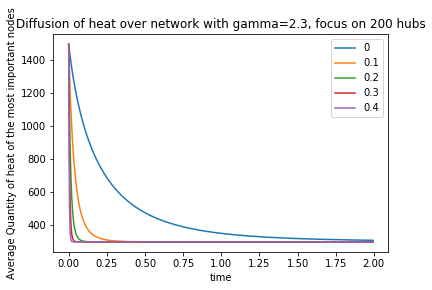

In [3]:
#for larger networks
import numpy as np
import networkx as nx
from scipy import linalg as LA
from heapq import nlargest
from operator import itemgetter
import matplotlib.pyplot as plt

fh=open("graph-exponent-2.3.dat", 'rb')
G=nx.read_edgelist(fh)
fh.close()
n = len(G.nodes())
dd = nx.degree_centrality(G)
degmax= dict(nlargest(200,dd.items(), key=itemgetter(1)))
phi_0 = [0]*n
keylist = list(map(int, degmax.keys()))
i=0
for key in keylist:
    phi_0[key]=500+i
    i=i+10

#x_vals = np.arange(0,0.5,0.005)
x_vals =[0,0.1,0.2,0.3,0.4]
t_vals =[]
tot_vals=[]
time=2.0
for x in x_vals:
    L =  genlaplacian(G,x)
    D, V = LA.eigh(L);                              #Compute the eigenvalues/vectors of the laplacian matrix
    D = np.reshape(D,(n,1), order='F')
    phi_0 = np.reshape(phi_0,(n,1), order='F');
    phi_0V = np.dot((V.conj().transpose()),phi_0) 
    for t in np.arange(0,time,0.005):               #Loop through times and decay each initial component
        Phi   = (phi_0V* (np.exp(-D*t)));                             #Exponential decay for each component
        Phi   = np.dot(V,Phi);               
        phi_t = (Phi.ravel()).tolist()
        t_vals.append(np.mean([phi_t[index] for index in keylist]))
        #t_vals.append(c)
        #c=[]
    tot_vals.append(t_vals) 
    t_vals=[]
    
for tt in tot_vals:
    plt.plot(np.arange(0,time,0.005),tt)
plt.xlabel('time')
plt.ylabel('Average Quantity of heat of the most important nodes')
plt.title('Diffusion of heat over network with gamma=2.3, focus on 200 hubs')
plt.legend(x_vals)
plt.show()

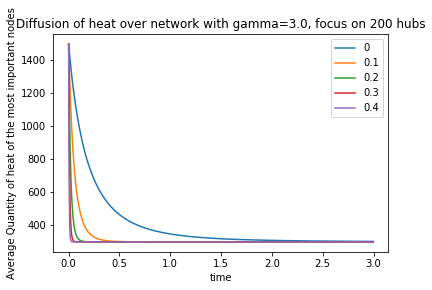

In [12]:
#for larger networks
import numpy as np
import networkx as nx
from scipy import linalg as LA
from heapq import nlargest
from operator import itemgetter
import matplotlib.pyplot as plt

fh=open("graph-exponent-3.0.dat", 'rb')
G=nx.read_edgelist(fh)
fh.close()
n = len(G.nodes())
dd = nx.degree_centrality(G)
degmax= dict(nlargest(200,dd.items(), key=itemgetter(1)))
phi_0 = [0]*n
keylist = list(map(int, degmax.keys()))
i=0
for key in keylist:
    phi_0[key]=500+i
    i=i+10

#x_vals = np.arange(0,0.5,0.005)
x_vals =[0,0.1,0.2,0.3,0.4]
t_vals =[]
tot_vals=[]
time=3.0
for x in x_vals:
    L =  genlaplacian(G,x)
    D, V = LA.eigh(L);                              #Compute the eigenvalues/vectors of the laplacian matrix
    D = np.reshape(D,(n,1), order='F')
    phi_0 = np.reshape(phi_0,(n,1), order='F');
    phi_0V = np.dot((V.conj().transpose()),phi_0) 
    for t in np.arange(0,time,0.005):               #Loop through times and decay each initial component
        Phi   = (phi_0V* (np.exp(-D*t)));                             #Exponential decay for each component
        Phi   = np.dot(V,Phi);               
        phi_t = (Phi.ravel()).tolist()
        t_vals.append(np.mean([phi_t[index] for index in keylist]))
        #t_vals.append(c)
        #c=[]
    tot_vals.append(t_vals) 
    t_vals=[]
    
for tt in tot_vals:
    plt.plot(np.arange(0,time,0.005),tt)
plt.xlabel('time')
plt.ylabel('Average Quantity of heat of the most important nodes')
plt.title('Diffusion of heat over network with gamma=3.0, focus on 200 hubs')
plt.legend(x_vals)
plt.show()

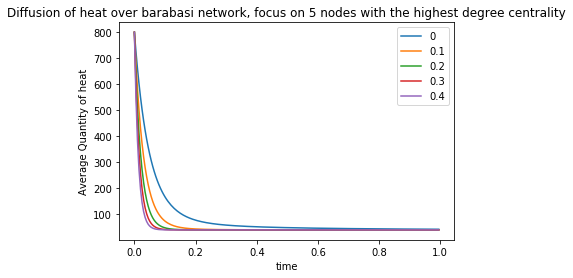

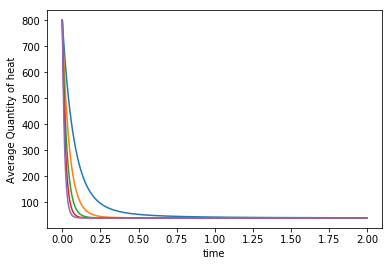

In [11]:
#for larger networks
import numpy as np
import networkx as nx
from scipy import linalg as LA
from heapq import nlargest
from operator import itemgetter
import matplotlib.pyplot as plt

n = 100
G = nx.erdos_renyi_graph(n, 0.06, seed=None)
dd = nx.degree_centrality(G)
degmax= dict(nlargest(5,dd.items(), key=itemgetter(1)))
phi_0 = [0]*n
keylist = list(map(int, degmax.keys()))
i=0
for key in keylist:
    phi_0[key]=500+i
    i=i+150

#x_vals = np.arange(0,0.5,0.005)
x_vals =[0,0.1,0.2,0.3,0.4]
t_vals =[]
tot_vals=[]
for x in x_vals:
    L =  genlaplacian(G,x)
    D, V = LA.eigh(L);                              #Compute the eigenvalues/vectors of the laplacian matrix
    D = np.reshape(D,(n,1), order='F')
    phi_0 = np.reshape(phi_0,(n,1), order='F');
    phi_0V = np.dot((V.conj().transpose()),phi_0) 
    for t in np.arange(0,2.0,0.005):               #Loop through times and decay each initial component
        Phi   = (phi_0V* (np.exp(-D*t)));                             #Exponential decay for each component
        Phi   = np.dot(V,Phi);               
        phi_t = (Phi.ravel()).tolist()
        t_vals.append(np.mean([phi_t[index] for index in keylist]))
        #t_vals.append(c)
        #c=[]
    tot_vals.append(t_vals) 
    t_vals=[]
    
for tt in tot_vals:
    plt.plot(np.arange(0,2.0,0.005),tt)
plt.xlabel('time')
plt.ylabel('Average Quantity of heat')
#plt.title('Diffusion of heat over Erdos-Renyi network, \n focus on 5 nodes with highest degree centrality')
#plt.legend(x_vals)
plt.show()

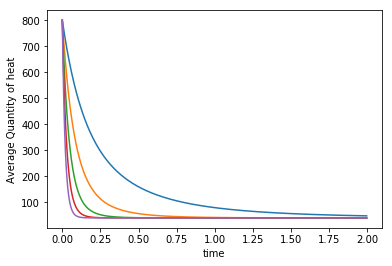

In [27]:
#for larger networks
import numpy as np
import networkx as nx
from scipy import linalg as LA
from heapq import nlargest
from operator import itemgetter
import matplotlib.pyplot as plt

n = 100
G = nx.erdos_renyi_graph(n, 0.06, seed=None)
keylist = list(map(int, np.random.choice(n,5)))
phi_0 = [0]*n
i=0
for key in keylist:
    phi_0[key]=500+i
    i=i+150

#x_vals = np.arange(0,0.5,0.005)
x_vals =[0,0.1,0.2,0.3,0.4]
t_vals =[]
tot_vals=[]
for x in x_vals:
    L =  genlaplacian(G,x)
    D, V = LA.eigh(L);                              #Compute the eigenvalues/vectors of the laplacian matrix
    D = np.reshape(D,(n,1), order='F')
    phi_0 = np.reshape(phi_0,(n,1), order='F');
    phi_0V = np.dot((V.conj().transpose()),phi_0) 
    for t in np.arange(0,2.0,0.005):               #Loop through times and decay each initial component
        Phi   = (phi_0V* (np.exp(-D*t)));                             #Exponential decay for each component
        Phi   = np.dot(V,Phi);               
        phi_t = (Phi.ravel()).tolist()
        t_vals.append(np.mean([phi_t[index] for index in keylist]))
        #t_vals.append(c)
        #c=[]
    tot_vals.append(t_vals) 
    t_vals=[]
    
for tt in tot_vals:
    plt.plot(np.arange(0,2.0,0.005),tt)
plt.xlabel('time')
plt.ylabel('Average Quantity of heat')
#plt.title('Diffusion of heat over Erdos-Renyi network, \n focus on 5 nodes with highest degree centrality')
#leg = [r"$x = $" +str(x) for x in x_vals]
#plt.legend(leg)
plt.show()

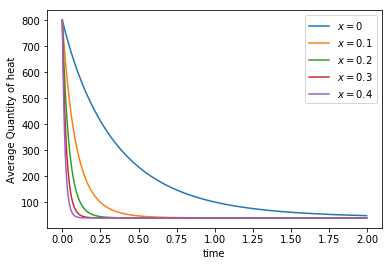

In [4]:
#for larger networks
import numpy as np
import networkx as nx
from scipy import linalg as LA
from heapq import nsmallest
from operator import itemgetter
import matplotlib.pyplot as plt

n = 100
G = nx.barabasi_albert_graph(n, 3, seed=None)
dd = nx.degree_centrality(G)
degmax= dict(nsmallest(5,dd.items(), key=itemgetter(1)))
phi_0 = [0]*n
keylist = list(map(int, degmax.keys()))
i=0
for key in keylist:
    phi_0[key]=500+i
    i=i+150

#x_vals = np.arange(0,0.5,0.005)
x_vals =[0,0.1,0.2,0.3,0.4]
t_vals =[]
tot_vals=[]
for x in x_vals:
    L =  genlaplacian(G,x)
    D, V = LA.eigh(L);                              #Compute the eigenvalues/vectors of the laplacian matrix
    D = np.reshape(D,(n,1), order='F')
    phi_0 = np.reshape(phi_0,(n,1), order='F');
    phi_0V = np.dot((V.conj().transpose()),phi_0) 
    for t in np.arange(0,2.0,0.005):               #Loop through times and decay each initial component
        Phi   = (phi_0V* (np.exp(-D*t)));                             #Exponential decay for each component
        Phi   = np.dot(V,Phi);               
        phi_t = (Phi.ravel()).tolist()
        t_vals.append(np.mean([phi_t[index] for index in keylist]))
    tot_vals.append(t_vals) 
    t_vals=[]
    
for tt in tot_vals:
    plt.plot(np.arange(0,2.0,0.005),tt)
plt.xlabel('time')
plt.ylabel('Average Quantity of heat')
#plt.title('Diffusion of heat over barabasi network, focus on 5 nodes with the least degree centrality')
leg = [r"$x = $" +str(x) for x in x_vals]
plt.legend(leg)
plt.show()

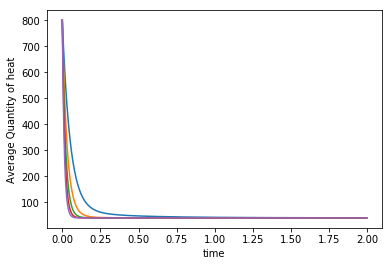

In [24]:
#for larger networks
import numpy as np
import networkx as nx
from scipy import linalg as LA
from heapq import nlargest
from operator import itemgetter
import matplotlib.pyplot as plt

n = 100
G = nx.barabasi_albert_graph(n, 3, seed=None)
dd = nx.degree_centrality(G)
degmax= dict(nlargest(5,dd.items(), key=itemgetter(1)))
phi_0 = [0]*n
keylist = list(map(int, degmax.keys()))
i=0
for key in keylist:
    phi_0[key]=500+i
    i=i+150

#x_vals = np.arange(0,0.5,0.005)
x_vals =[0,0.1,0.2,0.3,0.4]
t_vals =[]
tot_vals=[]
for x in x_vals:
    L =  genlaplacian(G,x)
    D, V = LA.eigh(L);                              #Compute the eigenvalues/vectors of the laplacian matrix
    D = np.reshape(D,(n,1), order='F')
    phi_0 = np.reshape(phi_0,(n,1), order='F');
    phi_0V = np.dot((V.conj().transpose()),phi_0) 
    for t in np.arange(0,2.0,0.005):               #Loop through times and decay each initial component
        Phi   = (phi_0V* (np.exp(-D*t)));                             #Exponential decay for each component
        Phi   = np.dot(V,Phi);               
        phi_t = (Phi.ravel()).tolist()
        t_vals.append(np.mean([phi_t[index] for index in keylist]))
        #t_vals.append(c)
        #c=[]
    tot_vals.append(t_vals) 
    t_vals=[]
    
for tt in tot_vals:
    plt.plot(np.arange(0,2.0,0.005),tt)
plt.xlabel('time')
plt.ylabel('Average Quantity of heat')
#plt.title('Diffusion of heat over barabasi network, focus on 5 nodes with the least degree centrality')
#leg = [r"$x = $" +str(x) for x in x_vals]
#plt.legend(leg)
plt.show()

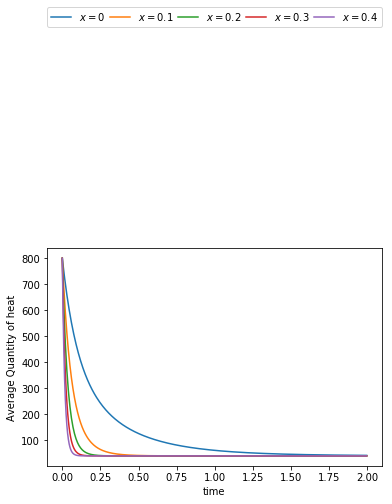

In [25]:
#for larger networks
import numpy as np
import networkx as nx
from scipy import linalg as LA
from operator import itemgetter
import matplotlib.pyplot as plt

n = 100
G = nx.barabasi_albert_graph(n, 3, seed=None)
#dd = nx.degree_centrality(G)
#degmax= dict(nsmallest(5,dd.items(), key=itemgetter(1)))
phi_0 = [0]*n
keylist = list(map(int, np.random.choice(n,5)))
i=0
for key in keylist:
    phi_0[key]=500+i
    i=i+150

#x_vals = np.arange(0,0.5,0.005)
x_vals =[0,0.1,0.2,0.3,0.4]
t_vals =[]
tot_vals=[]
for x in x_vals:
    L =  genlaplacian(G,x)
    D, V = LA.eigh(L);                              #Compute the eigenvalues/vectors of the laplacian matrix
    D = np.reshape(D,(n,1), order='F')
    phi_0 = np.reshape(phi_0,(n,1), order='F');
    phi_0V = np.dot((V.conj().transpose()),phi_0) 
    for t in np.arange(0,2.0,0.005):               #Loop through times and decay each initial component
        Phi   = (phi_0V* (np.exp(-D*t)));                             #Exponential decay for each component
        Phi   = np.dot(V,Phi);               
        phi_t = (Phi.ravel()).tolist()
        t_vals.append(np.mean([phi_t[index] for index in keylist]))
        #t_vals.append(c)
        #c=[]
    tot_vals.append(t_vals) 
    t_vals=[]
    
for tt in tot_vals:
    plt.plot(np.arange(0,2.0,0.005),tt)
plt.xlabel('time')
plt.ylabel('Average Quantity of heat')
#plt.title('Diffusion of heat over barabasi network, focus on 5 nodes with the least degree centrality')
leg = [r"$x = $" +str(x) for x in x_vals]
#plt.legend(leg)
plt.legend(leg,bbox_to_anchor=(0., 2.02, 1., 2.02), loc=3,
           ncol=10, mode="expand", borderaxespad=0.)
plt.show()

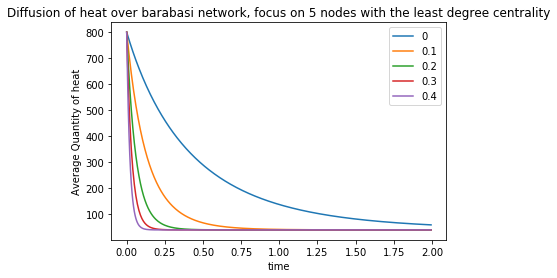

In [16]:
#for larger networks
import numpy as np
import networkx as nx
from scipy import linalg as LA
from heapq import nsmallest
from operator import itemgetter
import matplotlib.pyplot as plt

n = 100
G = nx.erdos_renyi_graph(n, 0.06, seed=None)
dd = nx.degree_centrality(G)
degmax= dict(nsmallest(5,dd.items(), key=itemgetter(1)))
phi_0 = [0]*n
keylist = list(map(int, degmax.keys()))
i=0
for key in keylist:
    phi_0[key]=500+i
    i=i+150

#x_vals = np.arange(0,0.5,0.005)
x_vals =[0,0.1,0.2,0.3,0.4]
t_vals =[]
tot_vals=[]
for x in x_vals:
    L =  genlaplacian(G,x)
    D, V = LA.eigh(L);                              #Compute the eigenvalues/vectors of the laplacian matrix
    D = np.reshape(D,(n,1), order='F')
    phi_0 = np.reshape(phi_0,(n,1), order='F');
    phi_0V = np.dot((V.conj().transpose()),phi_0) 
    for t in np.arange(0,2.0,0.005):               #Loop through times and decay each initial component
        Phi   = (phi_0V* (np.exp(-D*t)));                             #Exponential decay for each component
        Phi   = np.dot(V,Phi);               
        phi_t = (Phi.ravel()).tolist()
        t_vals.append(np.mean([phi_t[index] for index in keylist]))
        #t_vals.append(c)
        #c=[]
    tot_vals.append(t_vals) 
    t_vals=[]
    
for tt in tot_vals:
    plt.plot(np.arange(0,2.0,0.005),tt)
plt.xlabel('time')
plt.ylabel('Average Quantity of heat')
plt.title('Diffusion of heat over barabasi network, focus on 5 nodes with the least degree centrality')
plt.legend(x_vals)
plt.show()

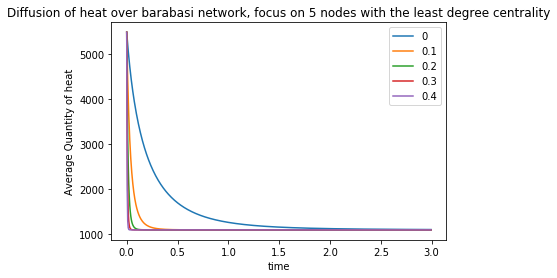

In [13]:
#for larger networks
import numpy as np
import networkx as nx
from scipy import linalg as LA
from heapq import nlargest
from operator import itemgetter
import matplotlib.pyplot as plt

fh=open("graph-exponent-2.3.dat", 'rb')
G=nx.read_edgelist(fh)
fh.close()
n = len(G.nodes())
dd = nx.degree_centrality(G)
degmax= dict(nlargest(200,dd.items(), key=itemgetter(1)))
phi_0 = [0]*n
keylist = list(map(int, degmax.keys()))
i=0
for key in keylist:
    phi_0[key]=500+i
    i=i+50

#x_vals = np.arange(0,0.5,0.005)
x_vals =[0,0.1,0.2,0.3,0.4]
t_vals =[]
tot_vals=[]
for x in x_vals:
    L =  genlaplacian(G,x)
    D, V = LA.eigh(L);                              #Compute the eigenvalues/vectors of the laplacian matrix
    D = np.reshape(D,(n,1), order='F')
    phi_0 = np.reshape(phi_0,(n,1), order='F');
    phi_0V = np.dot((V.conj().transpose()),phi_0) 
    for t in np.arange(0,3.0,0.005):               #Loop through times and decay each initial component
        Phi   = (phi_0V* (np.exp(-D*t)));                             #Exponential decay for each component
        Phi   = np.dot(V,Phi);               
        phi_t = (Phi.ravel()).tolist()
        t_vals.append(np.mean([phi_t[index] for index in keylist]))
        #t_vals.append(c)
        #c=[]
    tot_vals.append(t_vals) 
    t_vals=[]
    
for tt in tot_vals:
    plt.plot(np.arange(0,3.0,0.005),tt)
plt.xlabel('time')
plt.ylabel('Average Quantity of heat')
plt.title('Diffusion of heat over barabasi network, focus on 5 nodes with the least degree centrality')
plt.legend(x_vals)
plt.show()

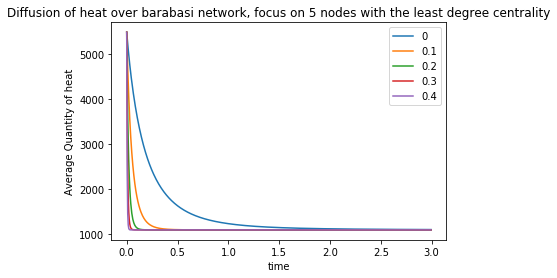

In [14]:
#for larger networks
import numpy as np
import networkx as nx
from scipy import linalg as LA
from heapq import nlargest
from operator import itemgetter
import matplotlib.pyplot as plt

fh=open("graph-exponent-3.0.dat", 'rb')
G=nx.read_edgelist(fh)
fh.close()
n = len(G.nodes())
dd = nx.degree_centrality(G)
degmax= dict(nlargest(200,dd.items(), key=itemgetter(1)))
phi_0 = [0]*n
keylist = list(map(int, degmax.keys()))
i=0
for key in keylist:
    phi_0[key]=500+i
    i=i+50

#x_vals = np.arange(0,0.5,0.005)
x_vals =[0,0.1,0.2,0.3,0.4]
t_vals =[]
tot_vals=[]
for x in x_vals:
    L =  genlaplacian(G,x)
    D, V = LA.eigh(L);                              #Compute the eigenvalues/vectors of the laplacian matrix
    D = np.reshape(D,(n,1), order='F')
    phi_0 = np.reshape(phi_0,(n,1), order='F');
    phi_0V = np.dot((V.conj().transpose()),phi_0) 
    for t in np.arange(0,3.0,0.005):               #Loop through times and decay each initial component
        Phi   = (phi_0V* (np.exp(-D*t)));                             #Exponential decay for each component
        Phi   = np.dot(V,Phi);               
        phi_t = (Phi.ravel()).tolist()
        t_vals.append(np.mean([phi_t[index] for index in keylist]))
        #t_vals.append(c)
        #c=[]
    tot_vals.append(t_vals) 
    t_vals=[]
    
for tt in tot_vals:
    plt.plot(np.arange(0,3.0,0.005),tt)
plt.xlabel('time')
plt.ylabel('Average Quantity of heat')
plt.title('Diffusion of heat over barabasi network, focus on 5 nodes with the least degree centrality')
plt.legend(x_vals)
plt.show()